In [79]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

# Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [80]:
# Fashion MNIST dataset
fashion_train = pd.read_csv("fashion_mnist/fashion-mnist_train.csv")
fashion_test = pd.read_csv("fashion_mnist/fashion-mnist_test.csv")

In [63]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_train_fashion = fashion_train.drop("label", axis=1)
y_train_fashion = fashion_train["label"]
X_test_fashion = fashion_test.drop("label", axis=1)
y_test_fashion = fashion_test["label"]

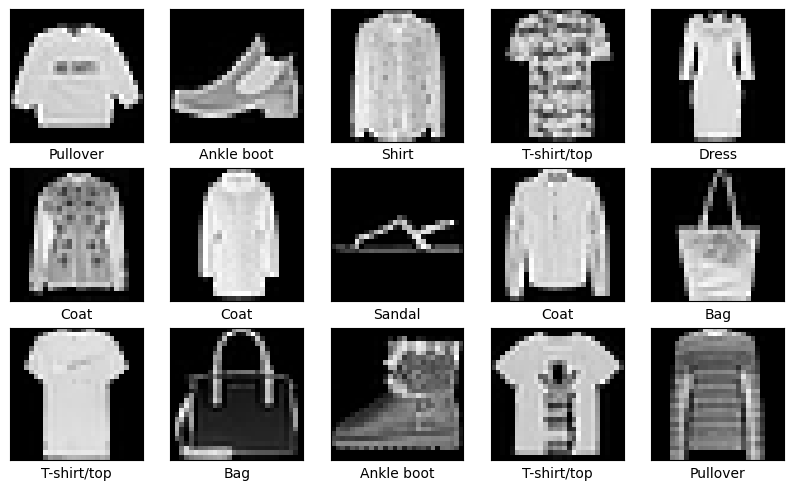

In [67]:
# Reshaping the dataset
x_train_reshape = X_train_fashion.values.reshape(-1, 28, 28)
x_test_reshape = X_test_fashion.values.reshape(-1, 28, 28)

# Names of clothing accessories in order
col_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Visualizing the images
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap="gray")
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [68]:
def visualize_input(img, ax):
    ax.imshow(img, cmap="summer")
    width, height = img.shape
    thresh = img.max() / 2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(
                str(round(img[x][y], 2)),
                xy=(y, x),
                horizontalalignment="center",
                verticalalignment="center",
                color="white" if img[x][y] < thresh else "black",
            )

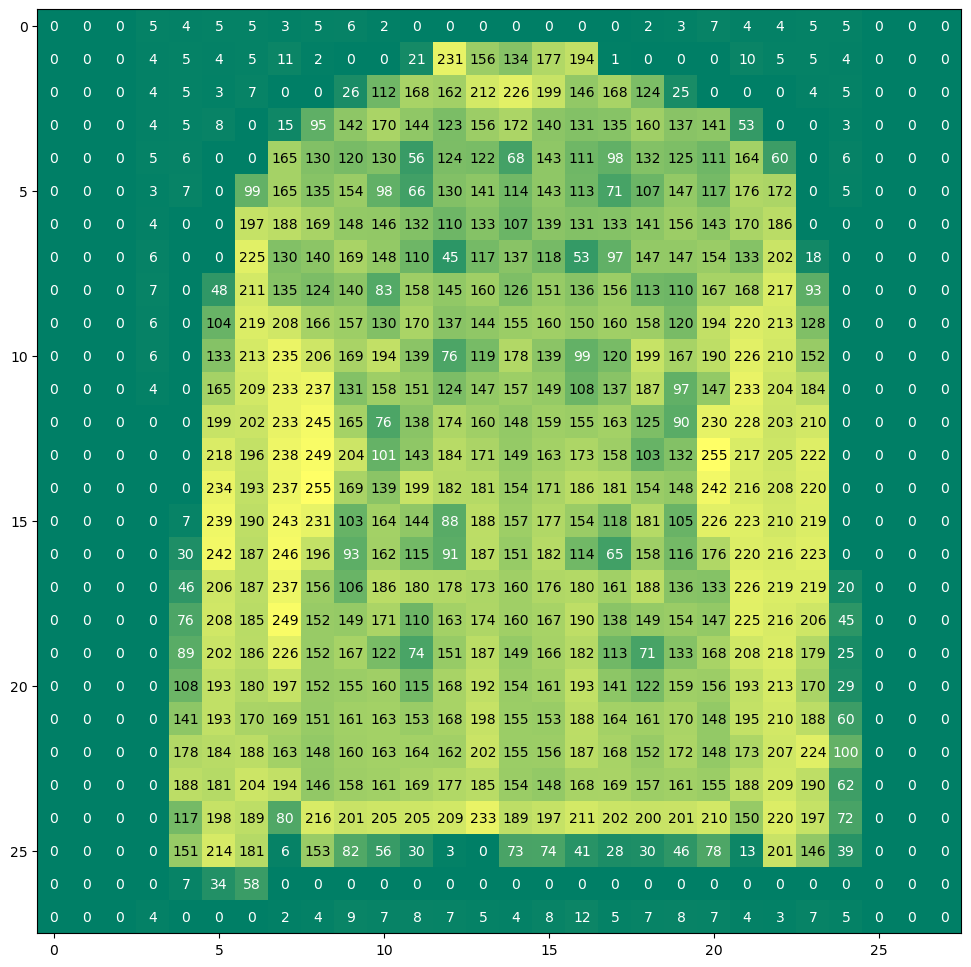

In [69]:
# Visualizing for Fashion MNIST
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
visualize_input(x_train_reshape[5], ax)
plt.show()

In [70]:
# Encoding Fashion MNIST Labels
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [71]:
# Creating base neural network
model2 = keras.Sequential(
    [
        layers.Dense(128, activation="relu", input_shape=(784,)),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(24, activation="relu"),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(24, activation="relu"),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax"),
    ]
)

In [72]:
model2.compile(loss="categorical_crossentropy", metrics=["accuracy", "mae"])
history = model2.fit(
    X_train_fashion, y_train_fashion, batch_size=100, epochs=30, validation_split=0.2
)

Epoch 1/30
480/480 [==============================] - 8s 11ms/step - loss: 1.0970 - accuracy: 0.6308 - mae: 0.1049 - val_loss: 0.5412 - val_accuracy: 0.8232 - val_mae: 0.0610
Epoch 2/30
480/480 [==============================] - 4s 9ms/step - loss: 0.7367 - accuracy: 0.7531 - mae: 0.0738 - val_loss: 0.4862 - val_accuracy: 0.8351 - val_mae: 0.0522
Epoch 3/30
480/480 [==============================] - 5s 10ms/step - loss: 0.6531 - accuracy: 0.7824 - mae: 0.0651 - val_loss: 0.4548 - val_accuracy: 0.8429 - val_mae: 0.0478
Epoch 4/30
480/480 [==============================] - 5s 10ms/step - loss: 0.6208 - accuracy: 0.7961 - mae: 0.0614 - val_loss: 0.4562 - val_accuracy: 0.8367 - val_mae: 0.0459
Epoch 5/30
480/480 [==============================] - 3s 7ms/step - loss: 0.5956 - accuracy: 0.8028 - mae: 0.0590 - val_loss: 0.4163 - val_accuracy: 0.8597 - val_mae: 0.0420
Epoch 6/30
480/480 [==============================] - 4s 8ms/step - loss: 0.5725 - accuracy: 0.8111 - mae: 0.0567 - val_loss: 0

In [73]:
# Cell 4: Evaluate the model
test_loss_fashion, test_acc_fashion, test_mae_fashion = model2.evaluate(
    X_test_fashion, y_test_fashion
)
print("Fashion MNIST Test loss:", test_loss_fashion)
print("Fashion MNIST Test accuracy:", test_acc_fashion)
print("Fashion MNIST Test MAE:", test_mae_fashion)

313/313 [==============================] - 2s 5ms/step - loss: 0.3721 - accuracy: 0.8771 - mae: 0.0358
Fashion MNIST Test loss: 0.3720764219760895
Fashion MNIST Test accuracy: 0.8770999908447266
Fashion MNIST Test MAE: 0.03579949215054512


In [74]:
# Predicting the labels-Fashion
y_predict_fash = model2.predict(X_test_fashion)
y_predict_fash = np.argmax(y_predict_fash, axis=1)
y_test_fash_eval = np.argmax(y_test_fashion, axis=1)

313/313 [==============================] - 2s 4ms/step


In [76]:
# Display the first 10 predicted and actual labels
for i in range(10):
    print(f"Predicted: {y_predict_fash[i]}, Actual: {y_test_fash_eval[i]}")

Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 6, Actual: 2
Predicted: 3, Actual: 3
Predicted: 6, Actual: 2
Predicted: 8, Actual: 8
Predicted: 6, Actual: 6
Predicted: 5, Actual: 5
Predicted: 0, Actual: 0


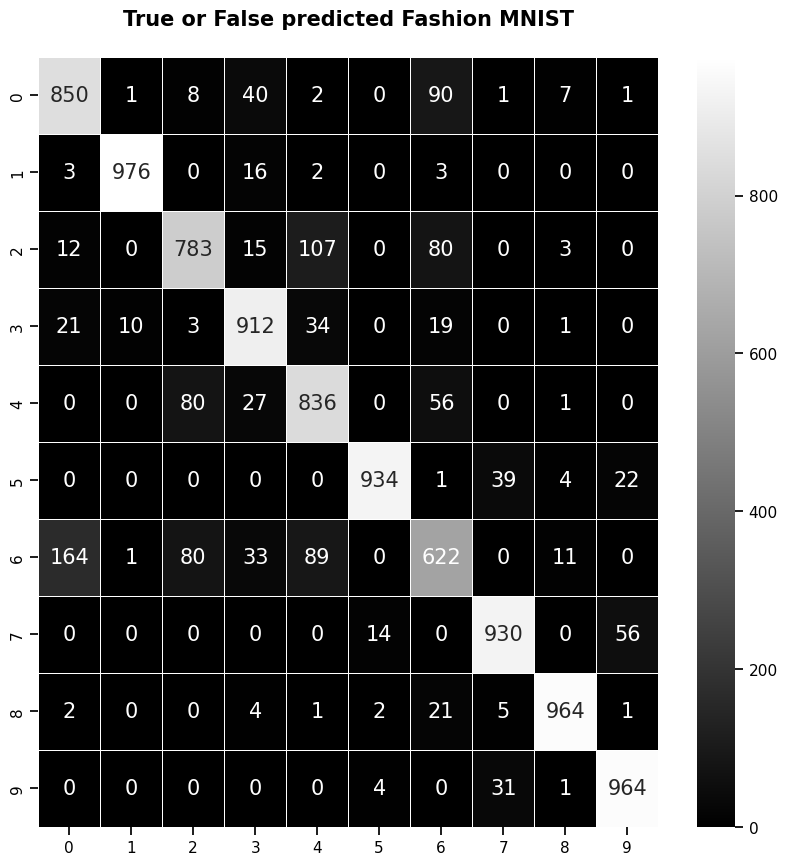

In [78]:
# Confusion matrix for Fashion MNIST
con_mat = confusion_matrix(y_test_fash_eval, y_predict_fash)
plt.style.use("seaborn-v0_8-deep")
plt.figure(figsize=(10, 10))
sns.heatmap(
    con_mat, annot=True, annot_kws={"size": 15}, linewidths=0.5, fmt="d", cmap="gray"
)
plt.title("True or False predicted Fashion MNIST\n", fontweight="bold", fontsize=15)
plt.show()